In [192]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
pd.options.display.max_rows = 100

In [193]:
file_path = Path("./Recipe generator/data/recipes.csv")
df = pd.read_csv(file_path)

In [194]:
df['Country']=''
keyword_categories = pd.read_csv(Path("./keywords.csv"))
for country in tqdm(keyword_categories['Country'].dropna().str.lower()):
    for j in range(0,len(df)):
        try:
            if df.loc[j,'Keywords'].lower().find(country)!=-1:
                df.loc[j,'Country']=country
        except:
            continue


  0%|          | 0/77 [00:00<?, ?it/s]

In [196]:
df_combined_country=df[['AggregatedRating', 'Country']]
df_combined_country.drop(index=df_combined_country[df_combined_country['Country']=='nan'].index,inplace=True)
df_combined_country.dropna(inplace=True)
df_combined_country
# df_combined_country.to_csv('del100.csv')

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_63620/4082020058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_country.drop(index=df_combined_country[df_combined_country['Country']=='nan'].index,inplace=True)
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_63620/4082020058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_country.dropna(inplace=True)


,AggregatedRating,Country
1,3.0,indian
8,5.0,thai
11,5.0,european
12,4.5,european
17,5.0,mexican
...,...,...
520477,5.0,european
520706,5.0,european
520760,4.0,asian
520804,5.0,thai


In [180]:
country_count=df_combined_country['Country'].value_counts()<200
for country in country_count.index:
    if country_count[country]:
        df_combined_country.drop(df_combined_country[df_combined_country['Country']==country].index,inplace=True)
df_combined_country['Country'].value_counts()

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_63620/2755781342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_country.drop(df_combined_country[df_combined_country['Country']==country].index,inplace=True)


Country
european                        17061
mexican                          6074
asian                            4750
canadian                         4395
indian                           2856
australian                       2316
southwestern u.s.                2275
greek                            2239
chinese                          1826
southwest asia (middle east)     1806
tex mex                          1609
german                           1307
african                          1230
caribbean                        1219
south american                   1204
thai                             1143
spanish                          1039
scandinavian                      970
moroccan                          841
creole                            826
cajun                             824
japanese                          740
new zealand                       668
scottish                          649
hawaiian                          434
swedish                           395
poli

In [181]:
Country_ranking=pd.DataFrame(df_combined_country.groupby('Country').mean()['AggregatedRating'].sort_values(ascending=False))
Country_ranking

,AggregatedRating
Country,
swiss,4.757218
welsh,4.754717
polynesian,4.753623
moroccan,4.717004
greek,4.715945
australian,4.710708
spanish,4.695861
scandinavian,4.689175
cajun,4.688714


In [182]:
# df_combined_country['Country'].value_counts()
from numpy import random
import matplotlib.pyplot as plt
boxes=[]
labels=[]
for country in Country_ranking.index:
    boxes.append(df_combined_country[df_combined_country['Country']==country]['AggregatedRating'])
    labels.append(country)

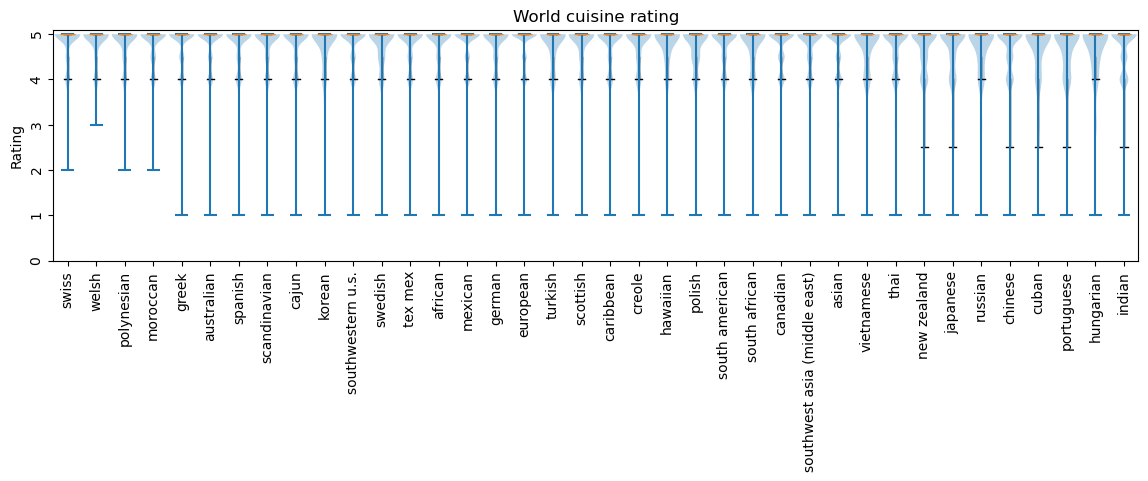

In [190]:
import seaborn as sns
plt.figure(figsize=(14,3))
plt.boxplot(boxes,labels=labels, showbox=False, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} )
plt.violinplot(boxes, widths=.9)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('World cuisine rating')
plt.ylim(0,5.1)
plt.show()

In [184]:
Country_ranking.to_csv('Country_ranking.csv')